### Neural Network 
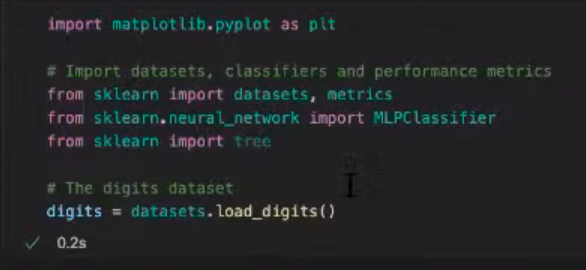

In [2]:
import matplotlib.pyplot as plt

#import digit data set

from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

digits = datasets.load_digits()

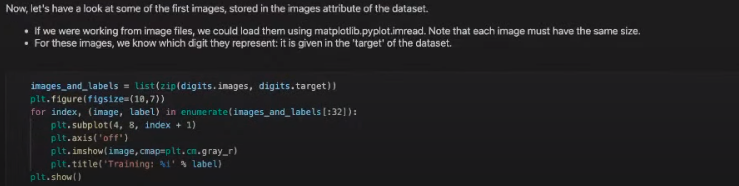

<function matplotlib.pyplot.show(close=None, block=None)>

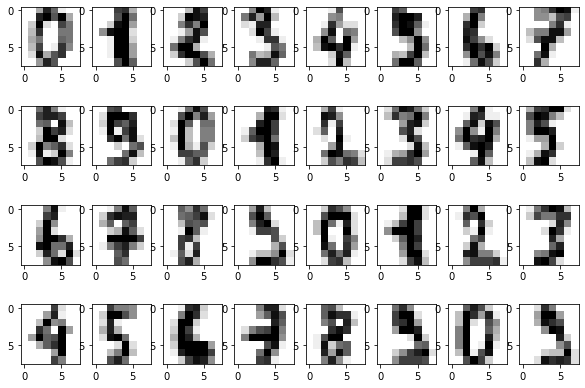

In [15]:
image_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(10,7))
for index, (image, Label) in enumerate(image_and_labels[:32]):
    plt.subplot(4,8,index+1)
  #  plt.axes('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
  #  plt.title('Target',lable)
plt.show

In [10]:
len(image_and_labels)

1797

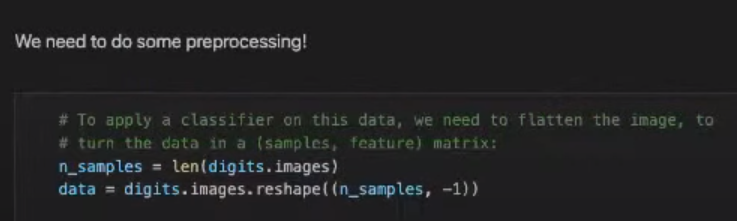

In [19]:
# to apply a classifer on the dataset, we need to flatten the image 
#ture the data into a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

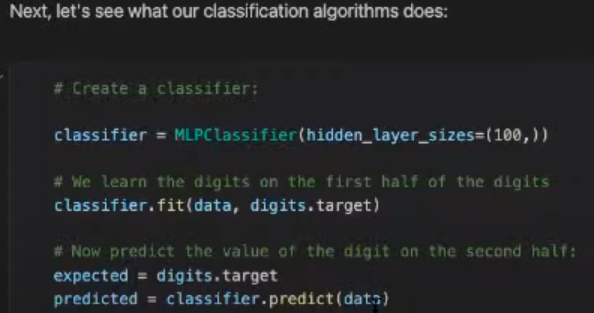

In [22]:
# create classfifers

classifier = MLPClassifier(hidden_layer_sizes=(100,))

#fitting the classifier where we learn the first half of the digits (50% dataset is used for training while other half remain..)

classifier.fit(data,digits.target)

# now predict the value of the digit on the second half 

expected = digits.target

predicted = classifier.predict(data)



In [23]:
predicted

array([0, 1, 2, ..., 8, 9, 8])

### not correcttly classified pics 
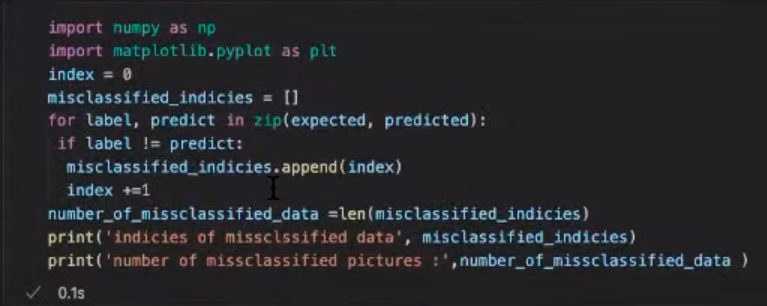

In [38]:
import numpy as np
import matplotlib.pyplot as plt 
index = 0 

misclassified_indicies = []
for label, predict in zip(expected, predicted):
    if label != predict:
        misclassified_indicies.append(index)
        index +=1 
number_of_misclassified_data = len(misclassified_indicies)
print('inicies of misclassified data', misclassified_indicies)
print('num of misclassifed pic', number_of_misclassified_data)

inicies of misclassified data []
num of misclassifed pic 0


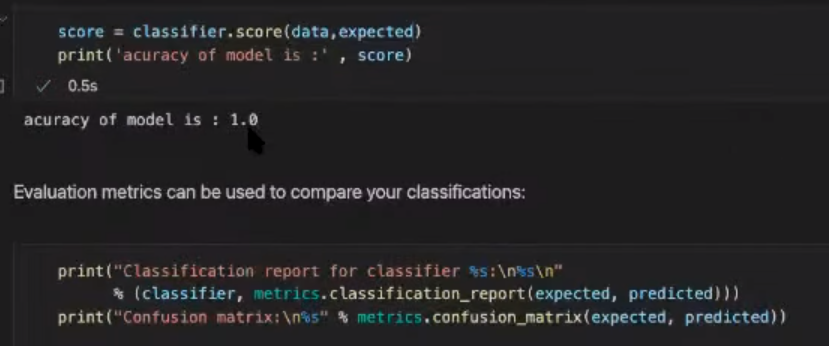

In [39]:
# check the model accuracy 

score = classifier.score(data,expected)
score

1.0

In [40]:
# display or check the confesuin matrix 
# 100% result found with neural network 
metrics.confusion_matrix(expected,predicted)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]], dtype=int64)

In [42]:
#uploading dataset again 

from sklearn import datasets

new_digits = datasets.load_digits()

In [43]:
new_digits.data.shape # to check the shape of the data 

(1797, 64)

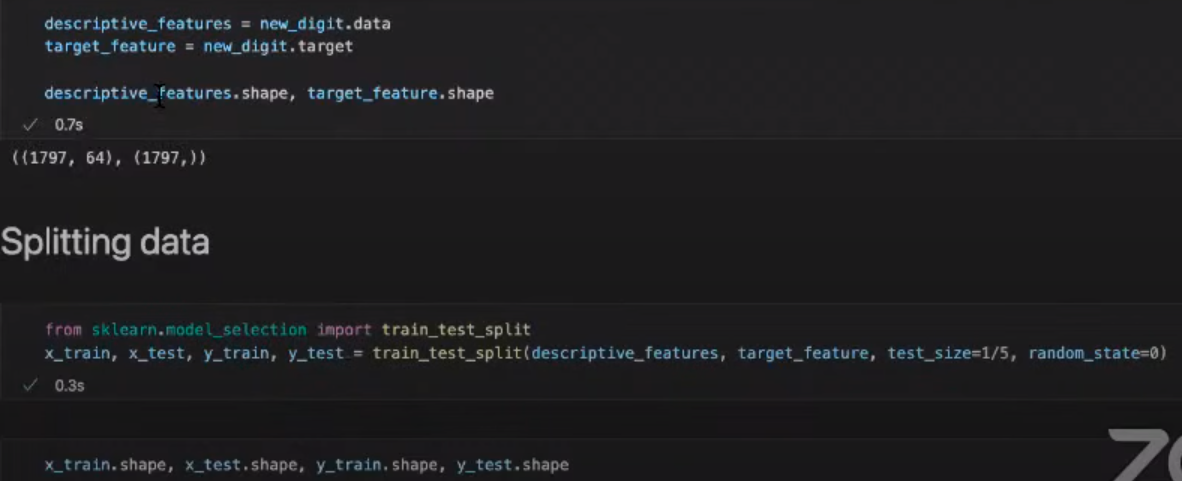

In [44]:
# making descriptive_features 

descriptive_features = new_digits.data # x
target_feature = new_digits.target    # y 

descriptive_features.shape,target_feature.shape

((1797, 64), (1797,))

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(descriptive_features,target_feature,test_size=0.2,random_state=0)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

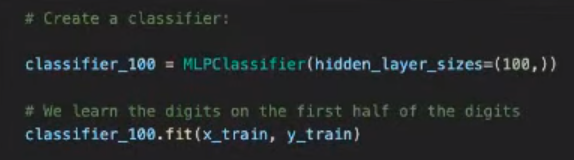

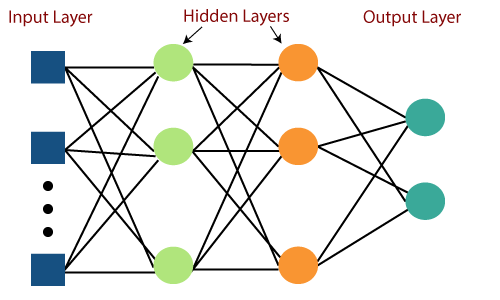

In [49]:
# now training model and using MLP classifier with hidden layer = 10

classifier_10 = MLPClassifier(hidden_layer_sizes=(10,))

#now learning the digits data as defined above test_size = 0.2 means the 80% will be available for training and 20% for testing 

classifier_10.fit(x_train,y_train)

C:\Users\Hisham Khalil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,))

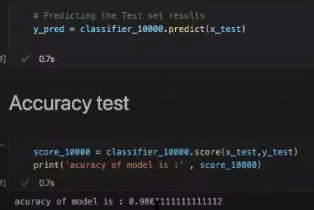

### prediction with 10 hidden layers 

In [55]:
y_pred = classifier_10.predict(x_test)

### find the score of the model in term of accuracy (in %age)

In [57]:
classifier_10.score(x_test,y_test)*100

93.05555555555556

In [58]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  2, 31,  1,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0, 37,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 37]], dtype=int64)

<AxesSubplot:>

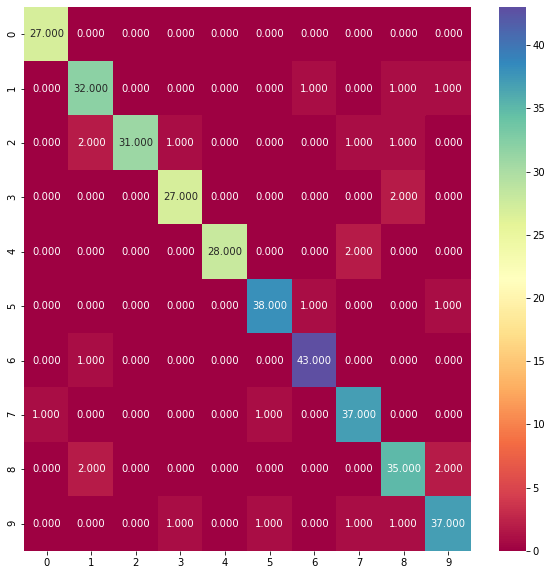

In [66]:
import seaborn as sns
plt.figure(figsize=(10,10))
#sns.heatmap(cm, annot= True, fmt=".3f",linewidths=0.5,square= True,cmap='spectral')
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Spectral') #make cap " S" for Spectral 